In [1]:

import matplotlib.pyplot as plt
import os
import platform

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector


In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
else:
    raise OSError('Unknown platform')

In [3]:
run_name = 'drift_scan_11-13-24'
run_dir = f'{base_dir}{run_name}/'

detector = 'asacusa_strip_1'
drift_vs = [800, 750, 700, 650]

# file_nums = list(range(0, 1))
file_nums = 'all'

chunk_size = 5  # Number of files to process at once

run_json_path = f'{run_dir}run_config.json'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

Reading in data...


100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Read in data shape: (11193, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 28.88it/s]


Fitting time: 0.2710750102996826 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  2.52it/s]


Read in data shape: (5476, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 70.18it/s]


Fitting time: 0.15111231803894043 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  3.44it/s]


Read in data shape: (8148, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 39.56it/s]


Fitting time: 0.2009902000427246 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Read in data shape: (6787, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 47.68it/s]


Fitting time: 0.20186233520507812 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:01<00:00,  2.83it/s]


Read in data shape: (10235, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 29.27it/s]


Fitting time: 0.26186370849609375 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  1.80it/s]


Read in data shape: (6713, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 42.11it/s]


Fitting time: 0.23723435401916504 s
Processed chunk 2/2
Getting hits...
Reading in data...


100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Read in data shape: (10153, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 27.47it/s]


Fitting time: 0.293201208114624 s
Processed chunk 1/2


100%|██████████| 3/3 [00:01<00:00,  1.88it/s]


Read in data shape: (6799, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 38.88it/s]


Fitting time: 0.2608327865600586 s
Processed chunk 2/2
Getting hits...


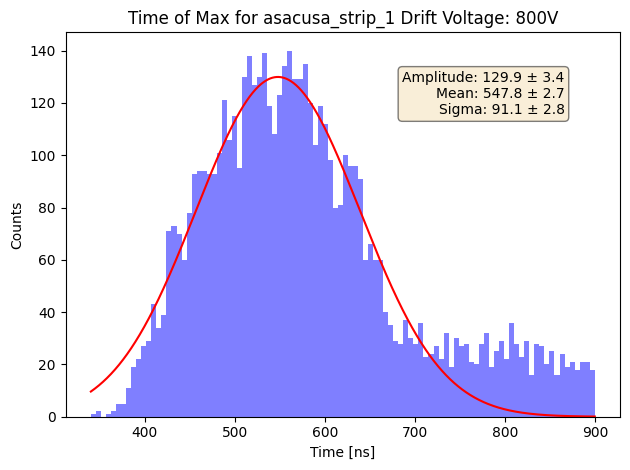

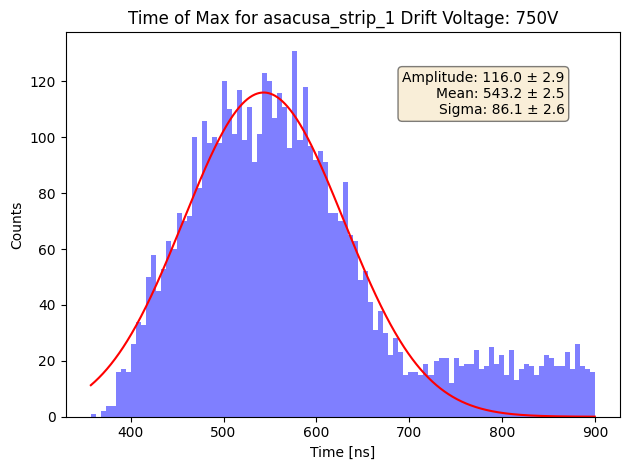

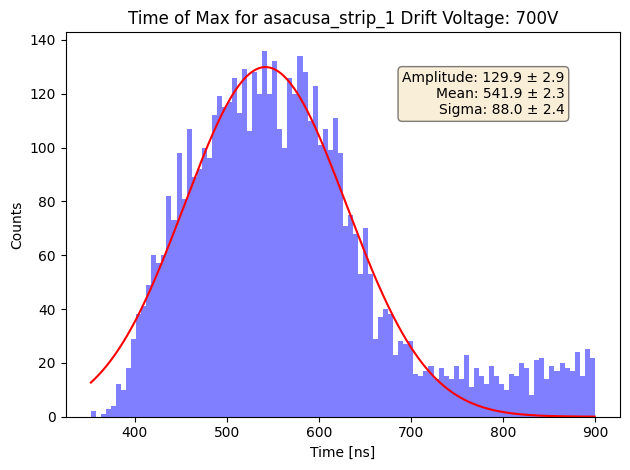

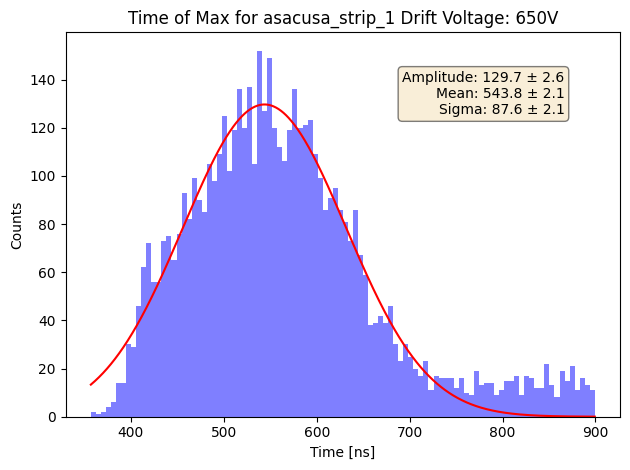

In [5]:
sigmas, sigma_errs = [], []
for v in drift_vs:
    sub_run_name = f'drift_{v}'
    data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
    ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
    det_config = det_config_loader.get_det_config(detector, sub_run_name=sub_run_name)
    det = DreamDetector(config=det_config)
    det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=False, waveform_fit_func='parabola_vectorized')
    det.dream_data.correct_for_fine_timestamps()
    sigma, sigma_err = det.dream_data.plot_event_time_maxes(max_channel=True, min_amp=None, plot=True)
    plt.title(f'Time of Max for {detector} Drift Voltage: {v}V')
    sigmas.append(sigma)
    sigma_errs.append(sigma_err)

Text(0.5, 1.0, 'Time Resolution vs Drift Voltage for asacusa_strip_1')

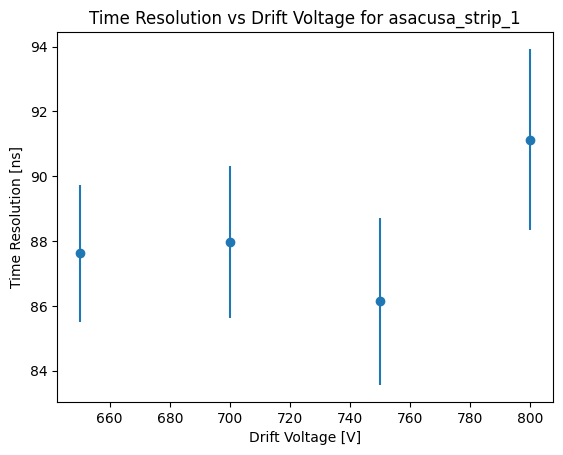

In [6]:
fig, ax = plt.subplots()
ax.errorbar(drift_vs, sigmas, yerr=sigma_errs, fmt='o')
ax.set_xlabel('Drift Voltage [V]')
ax.set_ylabel('Time Resolution [ns]')
ax.set_title(f'Time Resolution vs Drift Voltage for {detector}')